### Import Libraries

In [1]:
"If it does not work use code below while running this notebook in this dir."
# import sys
# import os
# sys.path.append(os.path.abspath(os.getcwd()))

from mytorch import Tensor
from mytorch import activation as active_func
from mytorch import loss as loss_func
from mytorch import optimizer as optim 
from mytorch import layer as nn

import numpy as np
import matplotlib.pyplot as plt

### Simple Network
here you have to define a simple linear layer to find coefficients of x_i in below problem. <br>
y = ax_1 + bx_2 + cx_3 <br><br>
![simple network.drawio.png](<attachment:simple network.drawio.png>)
<br><br>
weights of this linear layer is your answer. 

### Generate Data

In [2]:
"TODO: set coefficients"
a = -7
b = 3
c = -9

X = Tensor(np.random.randn(100, 3))
coef = Tensor(np.array([[a], [b], [c]]))
y = X @ coef + 5


In [3]:
X[0]

Tensor([0.62848103 1.06373067 0.75963125], requires_grad=False)

### Train Network

In [4]:
l = nn.Linear(3, 1)

"TODO: define an optimizer"

optimizer = optim.SGD([l],learning_rate=0.1)


"TODO: print weight and bias of linear layer"
print("initial W and bias:")
print(l.weight)
print(l.bias)

batch_size = 20
epLoss = []

for epoch in range(100):
    
    epoch_loss = 0.0
    
    for start in range(0, 100, batch_size):
        end = start + batch_size

        inputs = X[start:end]
        real_y = y[start:end]
        real_y.data = real_y.data.reshape(batch_size, 1)
        
        # TODO: predicted
        predicted_y = l(inputs)

        # TODO: calculate MSE loss
        loss = loss_func.MeanSquaredError(predicted_y, real_y)


        # TODO: backward
        optimizer.zero_grad()
        grad = np.ones(loss.shape)
        loss.backward(grad)

        # TODO: add loss to epoch_loss
        epoch_loss += loss.data.sum()

        # TODO: update w and b using optimizer
        optimizer.step()

    epLoss.append(epoch_loss)
    

initial W and bias:
Tensor([[ 0.43375743]
 [-1.30678722]
 [-0.50428905]], requires_grad=True)
None
privious weight = Tensor([[ 0.43375743]
 [-1.30678722]
 [-0.50428905]], requires_grad=True), grad = Tensor([[14.55899174]
 [-0.76102994]
 [24.68870364]], requires_grad=False)
updated weight = Tensor([[-1.02214175]
 [-1.23068423]
 [-2.97315941]], requires_grad=True)
privious weight = Tensor([[-1.02214175]
 [-1.23068423]
 [-2.97315941]], requires_grad=True), grad = Tensor([[ 13.67300052]
 [-13.72579342]
 [ 14.45172289]], requires_grad=False)
updated weight = Tensor([[-2.3894418 ]
 [ 0.14189512]
 [-4.4183317 ]], requires_grad=True)
privious weight = Tensor([[-2.3894418 ]
 [ 0.14189512]
 [-4.4183317 ]], requires_grad=True), grad = Tensor([[13.13664515]
 [-6.97885884]
 [13.44493634]], requires_grad=False)
updated weight = Tensor([[-3.70310631]
 [ 0.839781  ]
 [-5.76282533]], requires_grad=True)
privious weight = Tensor([[-3.70310631]
 [ 0.839781  ]
 [-5.76282533]], requires_grad=True), grad = 

privious weight = Tensor([[-6.45085641]
 [ 2.23774523]
 [-8.74644054]], requires_grad=True), grad = Tensor([[ 2.20672266]
 [-0.37455231]
 [ 0.90522412]], requires_grad=False)
updated weight = Tensor([[-6.67152868]
 [ 2.27520046]
 [-8.83696295]], requires_grad=True)
privious weight = Tensor([[-6.67152868]
 [ 2.27520046]
 [-8.83696295]], requires_grad=True), grad = Tensor([[ 0.89945005]
 [-4.99053565]
 [-2.90627483]], requires_grad=False)
updated weight = Tensor([[-6.76147368]
 [ 2.77425402]
 [-8.54633547]], requires_grad=True)
privious weight = Tensor([[-6.76147368]
 [ 2.77425402]
 [-8.54633547]], requires_grad=True), grad = Tensor([[ 1.71639156]
 [-0.37489935]
 [ 2.30080938]], requires_grad=False)
updated weight = Tensor([[-6.93311284]
 [ 2.81174396]
 [-8.7764164 ]], requires_grad=True)
privious weight = Tensor([[-6.93311284]
 [ 2.81174396]
 [-8.7764164 ]], requires_grad=True), grad = Tensor([[ 1.1580474 ]
 [ 2.31736461]
 [-0.82694904]], requires_grad=False)
updated weight = Tensor([[-

privious weight = Tensor([[-6.45085641]
 [ 2.23774523]
 [-8.74644054]], requires_grad=True), grad = Tensor([[ 2.20672266]
 [-0.37455231]
 [ 0.90522412]], requires_grad=False)
updated weight = Tensor([[-6.67152868]
 [ 2.27520046]
 [-8.83696295]], requires_grad=True)
privious weight = Tensor([[-6.67152868]
 [ 2.27520046]
 [-8.83696295]], requires_grad=True), grad = Tensor([[ 0.89945005]
 [-4.99053565]
 [-2.90627483]], requires_grad=False)
updated weight = Tensor([[-6.76147368]
 [ 2.77425402]
 [-8.54633547]], requires_grad=True)
privious weight = Tensor([[-6.76147368]
 [ 2.77425402]
 [-8.54633547]], requires_grad=True), grad = Tensor([[ 1.71639156]
 [-0.37489935]
 [ 2.30080938]], requires_grad=False)
updated weight = Tensor([[-6.93311284]
 [ 2.81174396]
 [-8.7764164 ]], requires_grad=True)
privious weight = Tensor([[-6.93311284]
 [ 2.81174396]
 [-8.7764164 ]], requires_grad=True), grad = Tensor([[ 1.1580474 ]
 [ 2.31736461]
 [-0.82694904]], requires_grad=False)
updated weight = Tensor([[-

### Evaluate

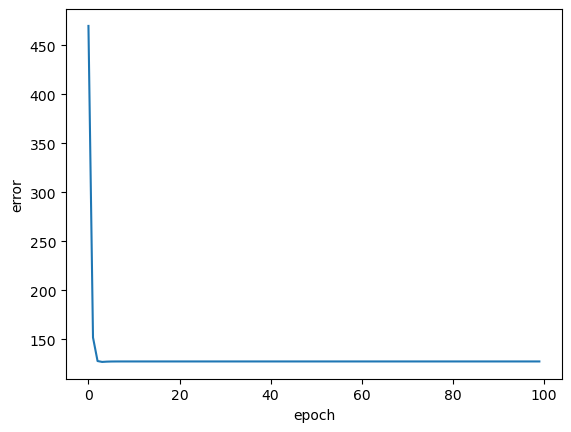


OUT W and bias:
Tensor([[-6.93311284]
 [ 2.81174396]
 [-8.7764164 ]], requires_grad=True)
None


In [5]:
plt.plot(epLoss, label='Error')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show();

print("\nOUT W and bias:")
print(l.weight)
print(l.bias)